# Kaggle Gravity Spy Dataset

Image Classification of Gravitational Waves using Machine learning

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"rsvpvsr","key":"3a8724c13e0d565742e4e7fa8adbe457"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tentotheminus9/gravity-spy-gravitational-waves

100% 3.88G/3.89G [01:14<00:00, 76.7MB/s]
100% 3.89G/3.89G [01:15<00:00, 55.6MB/s]


In [ ]:
!ls

gravity-spy-gravitational-waves.zip  kaggle.json  sample_data


In [ ]:
! mkdir data
! unzip gravity-spy-gravitational-waves.zip -d data

In [ ]:
test_dir = '/content/data/test/test/'
train_dir = '/content/data/train/train/'
val_dir = '/content/data/validation/validation/'

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import gzip
import random

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import pickle 
import gzip
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import cv2
import os
import numpy as np

In [ ]:
df = pd.read_csv('/content/data/trainingset_v1d1_metadata.csv')

#DATAFRAME

In [ ]:
df.head()

,event_time,ifo,peak_time,peak_time_ns,start_time,start_time_ns,duration,search,process_id,event_id,peak_frequency,central_freq,bandwidth,channel,amplitude,snr,confidence,chisq,chisq_dof,param_one_name,param_one_value,gravityspy_id,label,sample_type,url1,url2,url3,url4
0,1.134216e+09,L1,1134216192,931639909,1134216192,832031011,0.18750,Omicron,0,21,1337.695312,1120.043213,573.363953,GDS-CALIB_STRAIN,1.197650e-22,7.51139,0,0,0,phase,-2.72902,zmIdpucyOG,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
1,1.129360e+09,L1,1129359781,558593034,1129359781,47851085,0.94238,Omicron,0,107,654.747681,1823.073364,3426.576416,GDS-CALIB_STRAIN,8.255850e-23,9.63013,0,0,0,phase,1.10682,zWFRqqDxwv,Whistle,test,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
2,1.127425e+09,L1,1127425468,976317882,1127425468,960937023,0.04688,Omicron,0,218,1337.827515,2024.177490,3778.701904,GDS-CALIB_STRAIN,9.762940e-22,15.37104,0,0,0,phase,-0.83099,zKCTakFVcf,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
3,1.132637e+09,L1,1132636755,365233898,1132636754,951172113,0.82422,Omicron,0,88,1182.974609,3981.774658,7492.717773,GDS-CALIB_STRAIN,1.462120e-22,10.32116,0,0,0,phase,0.76242,z14BdoiFZS,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
4,1.132036e+09,L1,1132035853,197264909,1132035852,933837890,2.00366,Omicron,0,16,1456.511353,3979.026855,7942.912109,GDS-CALIB_STRAIN,4.038300e-22,14.38016,0,0,0,phase,-0.31161,yyjqLCtAmO,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...


In [ ]:
len(df['search']) 

7966

In [ ]:
class_names = os.listdir(train_dir)

Batch_size = 128  #The typical mini-batch sizes are 64, 128, 256 or 512.

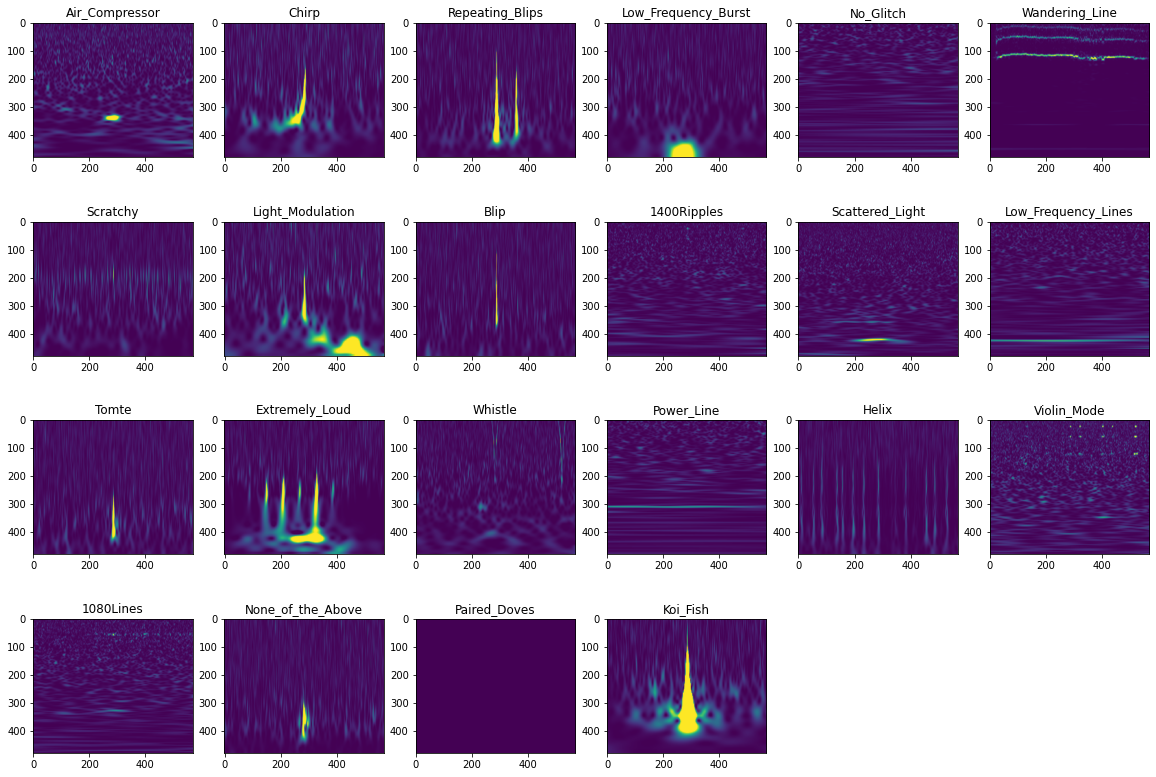

In [ ]:
plt.figure(figsize=(20,14))
for fold, i in zip(class_names,range(0,len(class_names))):

    plt.subplot(4,6, i+1)
    img_read = plt.imread(train_dir+fold+'/'+os.listdir(train_dir+fold)[0])
    plt.imshow(img_read)
    plt.title(class_names[i])
    
plt.show()

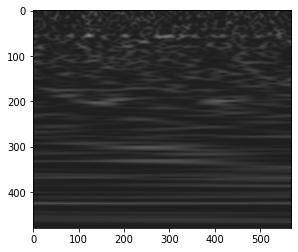

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('/content/data/train/train/1080Lines/H1_08UZkPPyFQ_spectrogram_0.5.png')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap=plt.get_cmap('gray'),  vmin=0, vmax=1)
plt.show()

# IMAGE PROCESSING

creating train, validation & test sets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image = mpimg.imread(image_path)     
            image = rgb2gray(image) 
            image = cv2.resize(image,(28,28),interpolation = cv2.INTER_AREA)
            image = np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [ ]:
X_train_list = create_dataset(train_dir) 


Runtime: 13m / 11m 13s

In [ ]:
X_val_list = create_dataset(val_dir)  

Runtime: 2m 56s / 2m 22s

In [ ]:
X_test_list = create_dataset(test_dir) 

Runtime: 2m 53s /2m 22s

In [ ]:
X_train = X_train_list[0]
y_train = X_train_list[1]

X_val = X_val_list[0]
y_val = X_val_list[1]

X_test = X_test_list[0]
y_test = X_test_list[1]

In [ ]:
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)

X_val_array = np.array(X_val)
y_val_array = np.array(y_val)

X_test_array = np.array(X_test)
y_test_array = np.array(y_test)

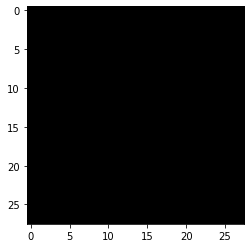

In [ ]:
img = X_val_array[12].squeeze()
plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()
#print('Label: ', X_val_list[1][10])

In [ ]:
X_train_array , y_train_array, X_test_array, y_test_array, X_val_array, y_val_array

In [ ]:
X_train_array = X_train_array.reshape(22348,28,28,1)
X_val_array= X_val_array.reshape(4800,28,28,1)
X_test_array= X_test_array.reshape(4720,28,28,1)

Labelling the Classes

In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(df['label']))}
target_dict

{'1080Lines': 0,
 '1400Ripples': 1,
 'Air_Compressor': 2,
 'Blip': 3,
 'Chirp': 4,
 'Extremely_Loud': 5,
 'Helix': 6,
 'Koi_Fish': 7,
 'Light_Modulation': 8,
 'Low_Frequency_Burst': 9,
 'Low_Frequency_Lines': 10,
 'No_Glitch': 11,
 'None_of_the_Above': 12,
 'Paired_Doves': 13,
 'Power_Line': 14,
 'Repeating_Blips': 15,
 'Scattered_Light': 16,
 'Scratchy': 17,
 'Tomte': 18,
 'Violin_Mode': 19,
 'Wandering_Line': 20,
 'Whistle': 21}

In [ ]:
train_target =  [target_dict[y_train_array[i]] for i in range(len(y_train_array))]
val_target =  [target_dict[y_val_array[i]] for i in range(len(y_val_array))]
test_target =  [target_dict[y_test_array[i]] for i in range(len(y_test_array))]

In [ ]:
train_target_array = np.array(train_target).reshape(22348,1)
val_target_array = np.array(val_target).reshape(4800,1)
test_target_array = np.array(test_target).reshape(4720,1)

# kNN Classifier with k = 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import sys
#score = []

#for k in range(1, 9):
 # print('Begin KNN with k=',k)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train_array.reshape(X_train_array.shape[0], 28*28), train_target_array)
pred = classifier.predict(X_val_array.reshape(X_val_array.shape[0], 28*28))
accuracy = accuracy_score(val_target_array, pred)
  #score.append(accuracy)
print("Accuracy: ",accuracy)
print("Confusion Matrix:\n", confusion_matrix(val_target_array, pred))
  #print("\n---------------\n")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.8633333333333333
Confusion Matrix:
 [[ 152   10    0   16    0    0    0    0    0    2    8    5    0    0
     2    0    0    0    0    0    0    1]
 [   0   50    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    1]
 [   0    0   29    3    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0 1058    0    4    0   32    0    0    0    1    0    0
     0    0    0    0    5    0    0    0]
 [   0    0    0    0   36    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    2    0  242    1   21    0    0    0    0    0    0
     0    0    0    2    0    0    0    0]
 [   0    2    0   11    0    0  152    0    1    0    0    0    0    0
     0    2    0    0    0    0    0    0]
 [   0    0    0    3    0    0    2  416    2    0    0    0    0    0
     0    1    0    0    0    0    0    0]
 [   0    0    0    5    0    0

# Runtime: 2m 59s

In [ ]:
for i in range(323,330):
  pred_test = classifier.predict(X_val_array[i].reshape(1, 28*28))
  print(i) 
  print('Predicted Class: ',pred_test)
  print('   Actual Class: ',test_target_array[i])
  i=i+10
  print('\n')
  

323
Predicted Class:  [3]
   Actual Class:  [3]


324
Predicted Class:  [3]
   Actual Class:  [3]


325
Predicted Class:  [3]
   Actual Class:  [3]


326
Predicted Class:  [3]
   Actual Class:  [3]


327
Predicted Class:  [3]
   Actual Class:  [3]


328
Predicted Class:  [3]
   Actual Class:  [3]


329
Predicted Class:  [3]
   Actual Class:  [3]




for k = 3,4,6,7,8

In [ ]:
k_values = [3,4,6,7,8]
score = []

for k in k_values:
  print('k = ',k)
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier = classifier.fit(X_train_array.reshape(X_train_array.shape[0], 28*28), train_target_array)
  pred = classifier.predict(X_val_array.reshape(X_val_array.shape[0], 28*28))
  accuracy = accuracy_score(val_target_array, pred)
  score.append(accuracy)
  print("Accuracy: ",accuracy)
  print("Confusion Matrix:\n", confusion_matrix(val_target_array, pred))
  print("\n---------------\n")

k =  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Accuracy:  0.8641666666666666
Confusion Matrix:
 [[ 158   12    0   14    0    0    0    0    0    1    6    3    0    0
     1    0    0    0    0    0    0    1]
 [   1   46    0    2    0    0    0    0    0    0    0    1    0    0
     0    0    0    0    0    0    0    2]
 [   1    0   26    3    0    0    0    0    0    0    0    0    0    0
     0    0    2    0    0    0    0    0]
 [   0    0    0 1053    0    4    0   36    0    0    0    1    0    0
     0    1    0    0    5    0    0    0]
 [   0    0    0    0   36    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    2    0  248    1   15    0    0    0    0    0    1
     0    1    0    0    0    0    0    0]
 [   0    0    0    9    0    0  157    0    0    0    0    0    0    0
     0    1    0    0    0    1    0    0]
 [   0    0    0    5    0    0    2  412    2    0    0    0    0    0
     0    3    0    0    0    0    0    0]
 [   0    0    0    4    0    0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Accuracy:  0.8622916666666667
Confusion Matrix:
 [[ 161   11    0   13    0    0    0    0    0    0    4    4    0    0
     2    0    0    0    0    0    0    1]
 [   1   47    0    1    0    0    0    0    0    0    0    1    0    0
     0    0    0    0    0    0    0    2]
 [   0    0   28    4    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0 1065    0    4    0   24    0    0    0    0    0    0
     0    0    0    0    7    0    0    0]
 [   0    0    0    1   35    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    2    0  250    0   13    0    0    0    0    0    1
     0    1    0    1    0    0    0    0]
 [   0    1    0    7    0    0  154    0    1    0    0    0    0    0
     0    4    1    0    0    0    0    0]
 [   0    0    0    8    0    0    2  410    2    0    0    0    0    0
     0    2    0    0    0    0    0    0]
 [   0    0    0    5    0    0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Accuracy:  0.858125
Confusion Matrix:
 [[ 151   10    0   20    0    0    0    0    0    1    6    5    0    0
     2    0    0    0    0    0    0    1]
 [   1   47    0    1    0    0    0    0    0    0    0    2    0    0
     0    0    0    0    0    0    0    1]
 [   1    0   28    3    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0 1067    0    4    0   24    0    0    0    0    0    0
     0    0    0    0    5    0    0    0]
 [   0    0    0    1   35    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    2    0  245    1   18    0    0    0    0    0    0
     0    0    0    2    0    0    0    0]
 [   0    2    0   10    0    0  152    0    1    0    0    1    0    0
     0    2    0    0    0    0    0    0]
 [   0    0    0    6    0    0    2  414    1    0    0    0    0    0
     0    1    0    0    0    0    0    0]
 [   0    0    0    6    0    0    2    1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Accuracy:  0.8589583333333334
Confusion Matrix:
 [[ 150   11    0   18    0    0    0    0    0    2    7    4    0    0
     2    0    0    0    0    0    0    2]
 [   0   51    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0   27    5    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0 1059    0    4    0   31    0    0    0    0    0    0
     0    0    0    0    6    0    0    0]
 [   0    0    0    1   35    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    2    0  241    1   21    0    0    0    0    0    0
     0    0    1    2    0    0    0    0]
 [   0    1    0   10    0    0  152    0    1    0    0    1    0    0
     0    2    0    0    0    0    0    1]
 [   0    0    0    6    0    0    2  414    1    0    0    0    0    0
     0    1    0    0    0    0    0    0]
 [   0    0    0    4    0    0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Accuracy:  0.85625
Confusion Matrix:
 [[ 152    8    0   19    0    0    0    0    0    1    6    6    0    0
     2    0    0    0    0    0    0    2]
 [   0   51    0    0    0    0    0    0    0    0    0    1    0    0
     0    0    0    0    0    0    0    0]
 [   1    0   27    4    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0 1067    0    4    0   24    0    0    0    0    0    0
     0    0    0    0    5    0    0    0]
 [   0    0    0    1   35    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    2    0  243    1   19    0    0    0    0    0    0
     0    0    1    2    0    0    0    0]
 [   0    1    0   11    0    0  150    0    1    0    0    0    0    0
     0    4    0    0    0    0    0    1]
 [   0    0    0    7    0    0    2  413    1    0    0    0    0    0
     0    1    0    0    0    0    0    0]
 [   0    0    0    6    0    0    3    1 

15m 16s

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import sys

classifier = KNeighborsClassifier(n_neighbors=2)
classifier = classifier.fit(X_train_array.reshape(X_train_array.shape[0], 28*28), train_target_array)
pred = classifier.predict(X_val_array.reshape(X_val_array.shape[0], 28*28))
accuracy = accuracy_score(val_target_array, pred)
  #score.append(accuracy)
print('k = 2')
print("Accuracy: ",accuracy)
print("Confusion Matrix:\n", confusion_matrix(val_target_array, pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k = 2
Accuracy:  0.8525
Confusion Matrix:
 [[ 161   11    0   13    0    0    0    0    0    1    4    4    0    0
     1    0    0    0    0    0    0    1]
 [   6   44    0    0    0    0    0    0    0    0    0    2    0    0
     0    0    0    0    0    0    0    0]
 [   1    0   30    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0 1074    0    4    0   18    0    0    0    1    0    0
     0    0    0    0    3    0    0    0]
 [   0    0    0    1   35    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    2    0  253    2   10    0    0    0    0    0    0
     0    1    0    0    0    0    0    0]
 [   1    1    0   14    0    0  150    0    1    0    0    0    0    0
     0    1    0    0    0    0    0    0]
 [   0    0    0   13    0    1    1  405    2    0    0    0    0    0
     0    2    0    0    0    0    0    0]
 [   0    0    0    5    0    1    2 

# Accuracy vs k values

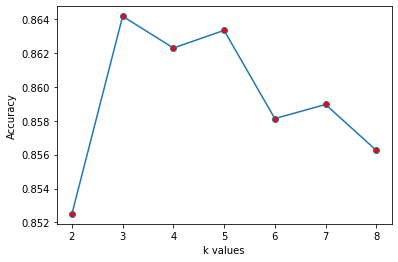

In [ ]:
accuracy_score = np.array([0.8525 , 0.8641666666666666, 0.8622916666666667, 0.8633333333333333, 0.858125, 0.8589583333333334, 0.85625])
k = np.array(range(2,9))

plt.plot(k,accuracy_score,marker='o',markerfacecolor='red')
plt.xlabel('k values')
plt.ylabel ('Accuracy')   
plt.show()

Maximum Accuracy at k=3 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import sys

classifier = KNeighborsClassifier(n_neighbors=3)
classifier = classifier.fit(X_train_array.reshape(X_train_array.shape[0], 28*28), train_target_array)
pred = classifier.predict(X_val_array.reshape(X_val_array.shape[0], 28*28))
accuracy = accuracy_score(val_target_array, pred)
  #score.append(accuracy)
print('k = 3')
print("Accuracy: ",accuracy)
print("Confusion Matrix:\n", confusion_matrix(val_target_array, pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


k = 3
Accuracy:  0.8641666666666666
Confusion Matrix:
 [[ 158   12    0   14    0    0    0    0    0    1    6    3    0    0
     1    0    0    0    0    0    0    1]
 [   1   46    0    2    0    0    0    0    0    0    0    1    0    0
     0    0    0    0    0    0    0    2]
 [   1    0   26    3    0    0    0    0    0    0    0    0    0    0
     0    0    2    0    0    0    0    0]
 [   0    0    0 1053    0    4    0   36    0    0    0    1    0    0
     0    1    0    0    5    0    0    0]
 [   0    0    0    0   36    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    1    0  248    1   15    0    0    0    0    0    2
     0    1    0    0    0    0    0    0]
 [   0    0    0    9    0    0  157    0    0    0    0    0    0    0
     0    1    0    0    0    1    0    0]
 [   0    0    0    5    0    0    2  412    2    0    0    0    0    0
     0    3    0    0    0    0    0    0]
 [   0    0    0    4    

In [ ]:
pred_test = classifier.predict(X_test_array.reshape(X_test_array.shape[0], 28*28))
accuracy_test = accuracy_score(test_target_array, pred_test)
print('Testing the model for k = 3 on the TEST SET')
print("Accuracy: ",accuracy_test)
print("Confusion Matrix:\n", confusion_matrix(test_target_array, pred_test))

Testing the model for k = 3 on the TEST SET
Accuracy:  0.8739406779661016
Confusion Matrix:
 [[ 172    7    0    8    0    0    1    0    0    0    2    6    0    0
     2    1    0    0    0    0    0    1]
 [   2   28    0    0    0    0    0    0    0    0    0    3    0    0
     0    0    0    0    0    0    0    3]
 [   0    0   31    2    0    0    0    0    0    0    0    0    0    0
     3    0    0    0    0    0    0    0]
 [   0    0    0 1040    0    0    0   30    3    0    8    3    1    0
     0    2    0    0    5    0    0    0]
 [   0    0    0    4   36    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  244    0    7    0    3    0    0    1    1
     0    0    0    0    0    0    0    0]
 [   0    0    0    5    0    0  163    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    3    0    4    0  401    0    0    0    0    0    0
     0    0    0    0    0    

Accuracy at k=3 on test set = 0.8739406779661016

In [ ]:
df['label'].value_counts()

Blip                   1821
Koi_Fish                706
Low_Frequency_Burst     621
Light_Modulation        512
Power_Line              449
Low_Frequency_Lines     447
Extremely_Loud          447
Scattered_Light         443
Violin_Mode             412
Scratchy                337
1080Lines               328
Whistle                 299
Helix                   279
Repeating_Blips         263
No_Glitch               150
Tomte                   103
None_of_the_Above        81
1400Ripples              81
Chirp                    60
Air_Compressor           58
Wandering_Line           42
Paired_Doves             27
Name: label, dtype: int64

In [ ]:
target_dict

{'1080Lines': 0,
 '1400Ripples': 1,
 'Air_Compressor': 2,
 'Blip': 3,
 'Chirp': 4,
 'Extremely_Loud': 5,
 'Helix': 6,
 'Koi_Fish': 7,
 'Light_Modulation': 8,
 'Low_Frequency_Burst': 9,
 'Low_Frequency_Lines': 10,
 'No_Glitch': 11,
 'None_of_the_Above': 12,
 'Paired_Doves': 13,
 'Power_Line': 14,
 'Repeating_Blips': 15,
 'Scattered_Light': 16,
 'Scratchy': 17,
 'Tomte': 18,
 'Violin_Mode': 19,
 'Wandering_Line': 20,
 'Whistle': 21}

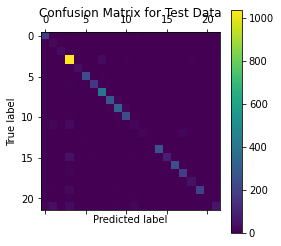

In [ ]:
# Plot Confusion Matrix Data as a Matrix
cf = confusion_matrix(test_target_array, pred_test)

plt.matshow(cf)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#SVM Classifier

In [ ]:
from sklearn import model_selection, svm, preprocessing
import sys
import numpy as np
import pickle

In [ ]:
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train_array.reshape(X_train_array.shape[0], 28*28),train_target_array)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#11m 27s


Accuracy of Classifier on Validation Images:  0.22916666666666666

Confusion Matrix: 
 [[   0    0    0  196    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0   52    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0   32    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0 1100    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0   36    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0  268    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0  168    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0  424    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    

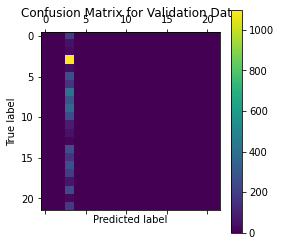

In [ ]:
pred = clf.predict(X_val_array.reshape(X_val_array.shape[0], 28*28))

accuracy = accuracy_score(val_target_array, pred)


confusion_matrix =confusion_matrix(val_target_array, pred)

print('\nAccuracy of Classifier on Validation Images: ',accuracy)

print('\nConfusion Matrix: \n',confusion_matrix)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(confusion_matrix)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#1m 52s

In [ ]:
clf = svm.SVC(gamma=0.1, kernel='linear')
clf.fit(X_train_array.reshape(X_train_array.shape[0], 28*28),train_target_array)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

11 m 31s


In [ ]:
pred_linear = clf.predict(X_val_array.reshape(X_val_array.shape[0], 28*28))

In [ ]:
accuracy_linear = accuracy_score(val_target_array, pred_linear)

#confusion_matrix = confusion_matrix(val_target_array, pred.reshape(pred.shape[0],1))

print('\nAccuracy of Classifier on Validation Images: ',accuracy_linear)

#print('\nConfusion Matrix: \n',confusion_matrix)

# Plot Confusion Matrix Data as a Matrix



Accuracy of Classifier on Validation Images:  0.22916666666666666
